### importing the dataset

In [4]:
import pandas as pd
file_path = '~/Documents/Projects/MLAA/data/raw_data/customers.csv'
df = pd.read_csv(
    filepath_or_buffer = file_path,
    delimiter = "|"
)
df.head()

,ssn,cc_num,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,acct_num
0,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,1959-10-03,888022315787
1,715-55-5575,4351161559407816183,Elaine,Fuller,F,310 Kendra Common Apt. 164,Leland,NC,28451,34.2680,-78.0578,27112,Professor Emeritus,1963-06-07,917558277935
2,167-48-5821,4192832764832,Michael,Cameron,M,05641 Robin Port,Cordova,SC,29039,33.4275,-80.8857,4215,International aid/development worker,1973-05-30,718172762479
3,406-83-7518,4238849696532874,Brandon,Williams,M,26916 Carlson Mountain,Birmingham,AL,35242,33.3813,-86.7046,493806,Seismic interpreter,1942-12-26,947268892251
4,697-93-1877,4514627048281480,Lisa,Hernandez,F,809 Burns Creek,Fargo,GA,31631,30.7166,-82.5801,559,Medical laboratory scientific officer,1939-05-22,888335239225


### explore the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ssn       1000 non-null   object 
 1   cc_num    1000 non-null   int64  
 2   first     1000 non-null   object 
 3   last      1000 non-null   object 
 4   gender    1000 non-null   object 
 5   street    1000 non-null   object 
 6   city      1000 non-null   object 
 7   state     1000 non-null   object 
 8   zip       1000 non-null   int64  
 9   lat       1000 non-null   float64
 10  long      1000 non-null   float64
 11  city_pop  1000 non-null   int64  
 12  job       1000 non-null   object 
 13  dob       1000 non-null   object 
 14  acct_num  1000 non-null   int64  
dtypes: float64(2), int64(4), object(9)
memory usage: 117.3+ KB


this table contains information about 1,000 customers with the follwing fields
- **ssn:** social security number
- **cc_num:** credit card number
- **first:** first name
- **last:** last name
- **gender** (self explanatory)
- **street** (address)
- **city**
- **state**
- **zip** (code)
- **lat:** latitude coordinates
- **long:** longiture coordinates
- **job** (self explanatory)
- **dob:** data of birth
- **acct_num:** account number

In [17]:
df.isna().sum()

ssn         0
cc_num      0
first       0
last        0
gender      0
street      0
city        0
state       0
zip         0
lat         0
long        0
city_pop    0
job         0
dob         0
acct_num    0
dtype: int64

meaning that there are not NaN values on the table

In [7]:
df.duplicated().sum()

np.int64(0)

there are no duplicate values on the dataset

### feature exploration

#### 1. ssn

In [21]:
field = 'ssn'
print(f'there are {len(df[field].unique())} unique {field} in the dataset')

there are 1000 unique ssn in the dataset


#### 2. cc_num

In [20]:
field = 'cc_num'
print(f'there are {len(df[field].unique())} unique {field} in the dataset')

there are 1000 unique cc_num in the dataset


#### 3. gender

In [23]:
df['gender'].value_counts(normalize=True)

gender
F    0.512
M    0.488
Name: proportion, dtype: float64

<Axes: ylabel='gender'>

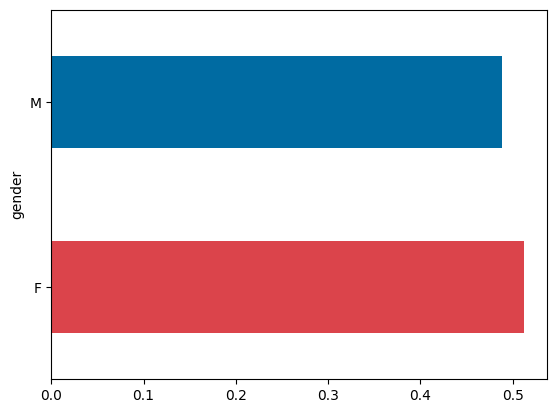

In [28]:
import matplotlib.pyplot as plt
palette = ['#DB444B', '#006BA2']
df.gender.value_counts(normalize=True).plot(kind = 'barh', color = palette)

there are slightly more female than male customers, though the difference is not substantial

#### 4. state

In [30]:
field = 'state'
print(f'there are {len(df[field].unique())} unique {field} in the dataset')

there are 51 unique state in the dataset


Text(0.5, 1.0, 'Top 10 states by number\nof customers')

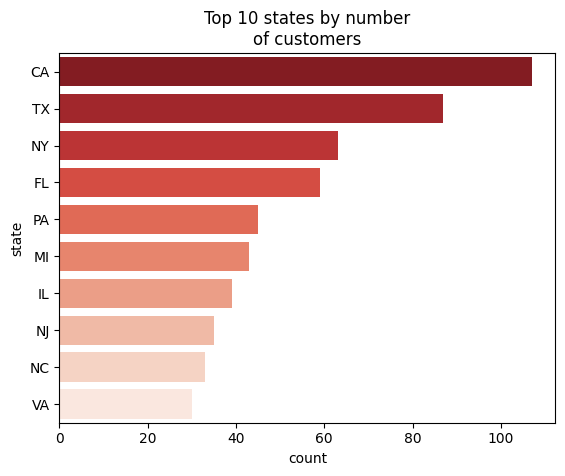

In [80]:
import seaborn as sns
data_to_plot = df['state'].value_counts().head(10).sort_values(ascending=False).reset_index()
sns.barplot(
    data = data_to_plot,
    y = 'state',
    x = 'count',
    hue = 'state',
    palette = 'Reds_r'
)
plt.title('Top 10 states by number\nof customers')

The states with the most amount of custumers are California, Texas and New York, however none of them account for more than 11% each over the total number of customers

#### 5. city and city_pop

In [71]:
field = 'city'
print(f'there are {len(df[field].unique())} unique {field} in the dataset')

there are 736 unique city in the dataset


Text(0.5, 1.0, 'Top 10 cities by population')

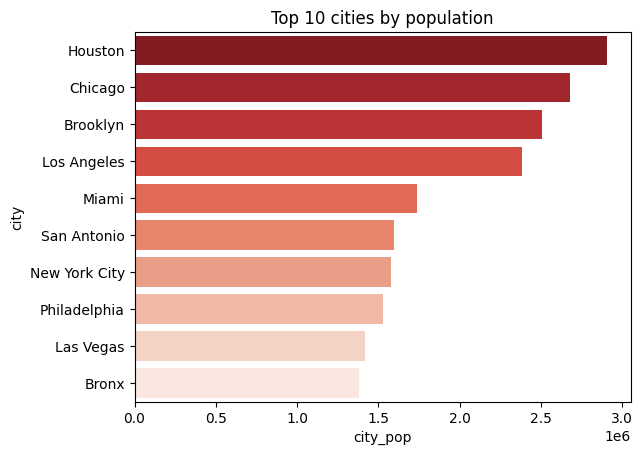

In [78]:
data_to_plot = df[['city', 'city_pop']].drop_duplicates().sort_values(by = 'city_pop', ascending=False).head(10)
sns.barplot(
    data = data_to_plot,
    y = 'city',
    x = 'city_pop',
    hue = 'city',
    palette = 'Reds_r'
)
plt.title('Top 10 cities by population')

#### 6. job

In [82]:
field = 'job'
print(f'there are {len(df[field].unique())} unique {field} in the dataset')

there are 507 unique job in the dataset


Text(0.5, 1.0, 'Top 10 jobs by number\nof customers')

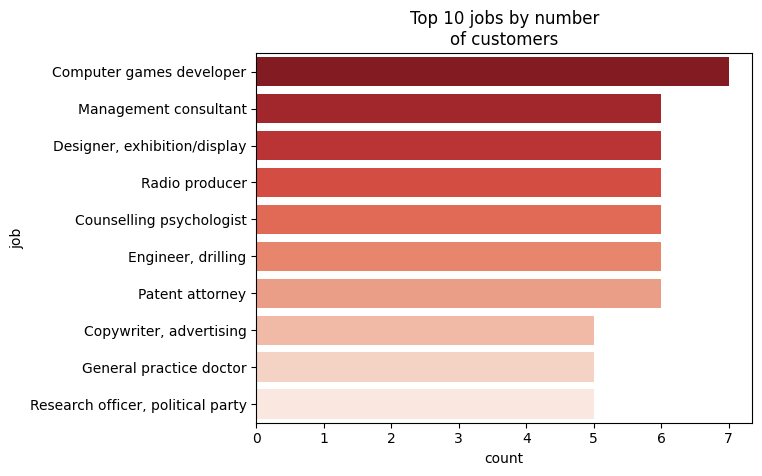

In [83]:
data_to_plot = df['job'].value_counts().head(10).sort_values(ascending=False).reset_index()
sns.barplot(
    data = data_to_plot,
    y = 'job',
    x = 'count',
    hue = 'job',
    palette = 'Reds_r'
)
plt.title('Top 10 jobs by number\nof customers')

### feature engineering

In [84]:
df_eng = df.copy()

#### 8. age feature

Text(0.5, 1.0, 'age histogram')

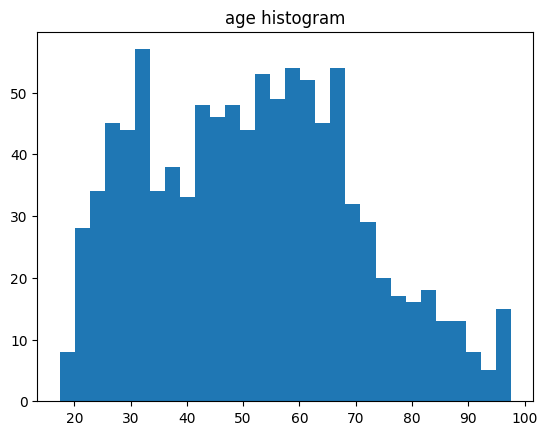

In [89]:
df_eng['dob'] = pd.to_datetime(df_eng['dob'])
df_eng['age'] = (pd.Timestamp('now') - df_eng['dob']).dt.days / 365
df_eng['age'].hist(bins = 30, grid = False)
plt.title('age histogram')

In [90]:
df_eng.drop(columns = ['dob'], inplace = True)
df_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ssn       1000 non-null   object 
 1   cc_num    1000 non-null   int64  
 2   first     1000 non-null   object 
 3   last      1000 non-null   object 
 4   gender    1000 non-null   object 
 5   street    1000 non-null   object 
 6   city      1000 non-null   object 
 7   state     1000 non-null   object 
 8   zip       1000 non-null   int64  
 9   lat       1000 non-null   float64
 10  long      1000 non-null   float64
 11  city_pop  1000 non-null   int64  
 12  job       1000 non-null   object 
 13  acct_num  1000 non-null   int64  
 14  age       1000 non-null   float64
dtypes: float64(3), int64(4), object(8)
memory usage: 117.3+ KB


### exporting the dataset for later usage

In [95]:
target_path = '~/Documents/Projects/MLAA/data/processed_data/customers_ready.csv'
df_eng.to_csv(path_or_buf = target_path, index = False)